<a href="https://colab.research.google.com/github/Rishabh-Tripathi1/Happy-Sad-Classification/blob/main/Happy_Sad_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import cv2
import os
import imghdr

# **Data Loading**

In [2]:
data_dir = '/content/drive/MyDrive/Machine Learning/Happy_Sad/data'

In [3]:
os.listdir(data_dir)

['sad', 'happy']

In [4]:
image_ext = ['jpeg', 'jpg', 'png', 'bmp']

In [6]:
#Removing dodgy images and taking in consideration only the ones meeting elibility

for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_ext:
        print('Image not in list'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('issue with image'.format(image_path))

In [7]:
tf.data.Dataset??

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
tf.keras.utils.image_dataset_from_directory??

In [10]:
# Data Pipeline rather than importing all data in the storage.
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 184 files belonging to 2 classes.


In [11]:
#Makes the data iteratable
data_iterator = data.as_numpy_iterator()
print(data_iterator)

In [12]:
batch = data_iterator.next()
#Class 1 = Sad
#Class 2 = Happy
batch[0]

array([[[[126.0625  , 137.0625  , 139.0625  ],
         [126.8125  , 137.8125  , 139.8125  ],
         [122.375   , 133.375   , 135.375   ],
         ...,
         [131.25    , 138.3125  , 140.625   ],
         [125.375   , 137.      , 137.1875  ],
         [120.1875  , 134.0625  , 134.0625  ]],

        [[126.10181 , 137.1018  , 139.1018  ],
         [127.32349 , 138.32349 , 140.32349 ],
         [122.80737 , 133.80737 , 135.80737 ],
         ...,
         [131.25    , 138.3125  , 140.625   ],
         [125.375   , 137.      , 137.1875  ],
         [120.1875  , 134.0625  , 134.0625  ]],

        [[127.0625  , 138.0625  , 140.0625  ],
         [128.39331 , 139.39331 , 141.39331 ],
         [123.0625  , 134.0625  , 136.0625  ],
         ...,
         [131.5625  , 138.625   , 140.9375  ],
         [125.375   , 137.      , 137.1875  ],
         [120.1875  , 134.0625  , 134.0625  ]],

        ...,

        [[102.      , 112.      , 103.      ],
         [104.1875  , 114.1875  , 105.1875  ]

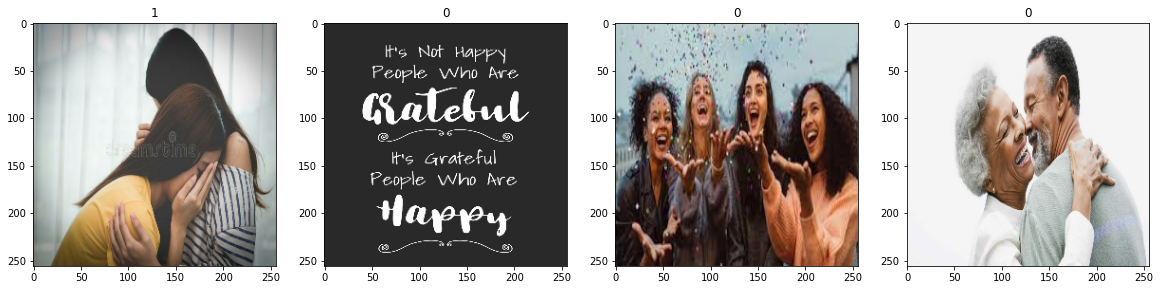

In [13]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# **Preprocess Data**

In [14]:
#Scale Data
data = data.map(lambda x,y: (x/255,y))

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

In [17]:
batch[0].min()

0.0

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [19]:
train_size+val_size+test_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Building Model**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation = "relu", input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [24]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# **Train**

In [26]:
logdir = 'logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
model.fit(train, epochs = 20, validation_data= val, callbacks = [tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 15s 887ms/step - loss: 0.8856 - accuracy: 0.5625 - val_loss: 0.8072 - val_accuracy: 0.3929
Epoch 2/20
4/4 [==============================] - 4s 764ms/step - loss: 0.7387 - accuracy: 0.4375 - val_loss: 0.6726 - val_accuracy: 0.4821
Epoch 3/20
4/4 [==============================] - 5s 770ms/step - loss: 0.6224 - accuracy: 0.6484 - val_loss: 0.5616 - val_accuracy: 0.6964
Epoch 4/20
4/4 [==============================] - 5s 910ms/step - loss: 0.6266 - accuracy: 0.6016 - val_loss: 0.5981 - val_accuracy: 0.7321
Epoch 5/20
4/4 [==============================] - 4s 791ms/step - loss: 0.5536 - accuracy: 0.7656 - val_loss: 0.5431 - val_accuracy: 0.6786
Epoch 6/20
4/4 [==============================] - 5s 905ms/step - loss: 0.5068 - accuracy: 0.7109 - val_loss: 0.3920 - val_accuracy: 0.8571
Epoch 7/20
4/4 [==============================] - 7s 2s/step - loss: 0.4650 - accuracy: 0.7656 - val_loss: 0.3306 - val_accuracy: 0.8571
Epoch 8/20
4/4 [======

# **Evaluating Performance**

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

In [32]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.0 0.0 0.0


# **Testing**

In [39]:
test_dir = '/content/drive/MyDrive/Machine Learning/Happy_Sad/'
photo = ['happy_test.jpg', 'sad_test.jpg']
test_path = os.path.join(test_dir, photo[0])

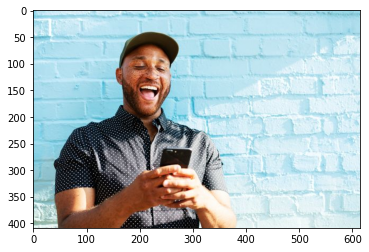

In [40]:
img = cv2.imread(test_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 184ms/step


In [43]:
if yhat > 0.5:
  print("Sad")
else:
  print("Happy")

Happy


# **Saving Model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
dir = '/content/drive/MyDrive/Machine Learning/Happy_Sad'
model.save(os.path.join(dir, 'Happy_Sad_Model.h5'))

In [ ]:
new_model = load_model(os.path.join(dir, 'Happy_Sad_Model.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))